<a href="https://colab.research.google.com/github/silviaarellanogarcia/HackEPS2022/blob/main/missi%C3%B3_groga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectius

La idea d'aquesta missió es orientar-la amb l'etiquetatge de dades. Part de la feina d'un data scientist és tenir dades amb la major informació possible per detectar patrons, problemes, estadístiques... Amb el dataset A1, volem que observeu les teles i realitzeu un algoritme per etiquetar les dades que teniu segons el patró file_folder que segueixen. Totes les teles que teniu a continuació tenen un patró diferent:


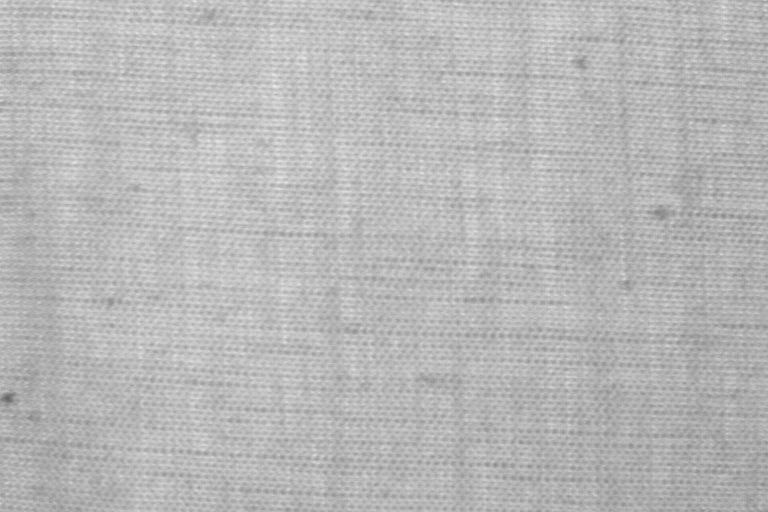

Què ens heu de donar? Un document (en Markdown, pdf, docx...) enumerant els diferents tipus de tela i un csv amb el nom del fitxer de la imatge i el tipus de patró en qüestió.


In [ ]:
# Llibreries necessàries
import pandas as pd
import numpy as np

In [ ]:
# Donar accés a Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Extraure les dades

In [ ]:
!pwd

/content


In [ ]:
#!unzip "gdrive/MyDrive/HackEPS2022/data/A1.zip" -d "gdrive/MyDrive/HackEPS2022/data/groc"

In [ ]:
!apt-get install tree 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (169 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree "gdrive/MyDrive/HackEPS2022/data/groc"

Se han truncado las últimas 5000 líneas del flujo de salida.
│   │               ├── c1r3e7n24.tif
│   │               ├── c1r3e7n24.tifяА║Zone.Identifier
│   │               ├── c1r3e7n25.tif
│   │               ├── c1r3e7n25.tifяА║Zone.Identifier
│   │               ├── c1r3e7n26.tif
│   │               ├── c1r3e7n26.tifяА║Zone.Identifier
│   │               ├── c1r3e7n27.tif
│   │               ├── c1r3e7n27.tifяА║Zone.Identifier
│   │               ├── c1r3e7n28.tif
│   │               ├── c1r3e7n28.tifяА║Zone.Identifier
│   │               ├── c1r3e7n29.tif
│   │               ├── c1r3e7n29.tifяА║Zone.Identifier
│   │               ├── c1r3e7n2.tif
│   │               ├── c1r3e7n2.tifяА║Zone.Identifier
│   │               ├── c1r3e7n30.tif
│   │               ├── c1r3e7n30.tifяА║Zone.Identifier
│   │               ├── c1r3e7n31.tif
│   │               ├── c1r3e7n31.tifяА║Zone.Identifier
│   │               ├── c1r3e7n32.tif
│   │               ├── c1r3e7n32.tifяА║Zone.Identifier
│

## Carregar les dades

In [ ]:
# Carreguem el csv amb les etiquetes i mirem quins tipus de dades tenim per familiaritzar-nos
tags = pd.read_csv("gdrive/MyDrive/HackEPS2022/data/groc/A1/img_tag.csv")
tags.head()

,Unnamed: 0,c,r,e,name,path,text
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Pequeño defecto de hilo en la mitad inferior d...
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Gran defecto de hilo en la imagen.
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Gran defecto de hilo en la imagen.
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Pequeño defecto de hilo en la mitad superior d...
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Gran defecto de hilo en la imagen.


# Recórrer les carpetes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# De tota la columna c, obtenim els diferents valors possibles
tags.c.unique()

array(['c3', 'c4', 'c2', 'c1'], dtype=object)

In [ ]:
# De tota la columna r, obtenim els diferents valors possibles
tags.r.unique()

array(['r1', 'r3', 'r2'], dtype=object)

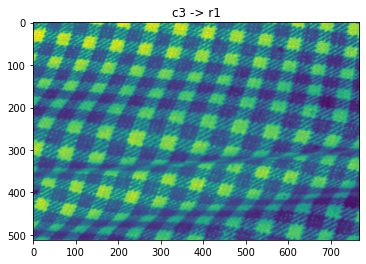

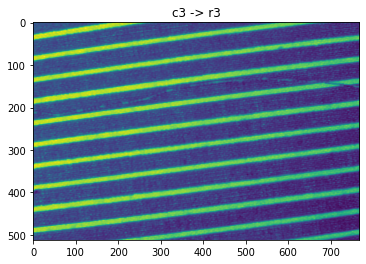

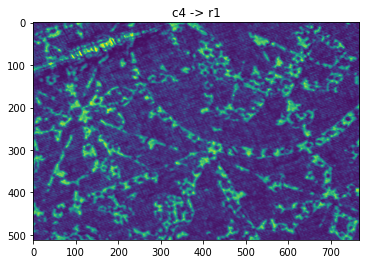

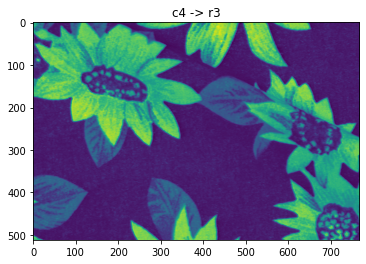

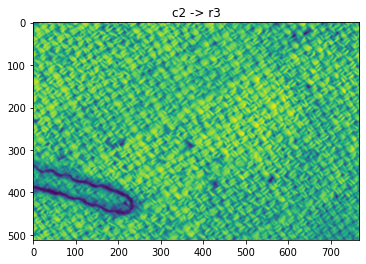

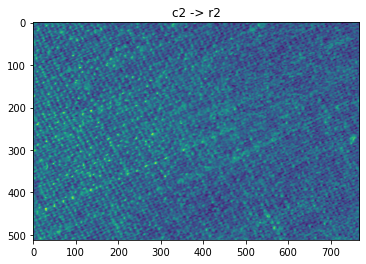

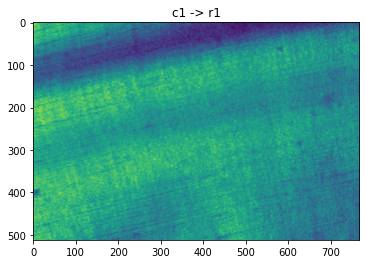

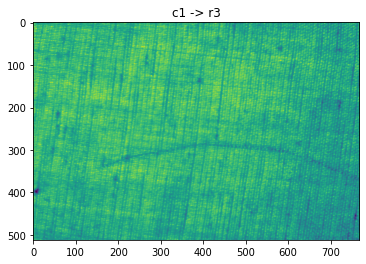

In [ ]:
# treure un exemple de cada tipus
for c in tags.c.unique():

  for r in tags.r.unique():
    
    path = tags.query(f'c == "{c}" and r == "{r}"')
    if len(path):
            
      path = path.sample().path
      path = str(path.values[0]).replace("badata/cd1/data/", "gdrive/MyDrive/HackEPS2022/data/groc/A1/").replace("\n", "") 

      img = plt.imread(path)
      plt.imshow(img)
      plt.title(f'{c} -> {r}')
      plt.show()

## Patrons detectats 

c1, r1 -> Primer tejido
c1, r3 -> Primer tejido

c2, r2 -> Segundo tejido
c2, r3 -> Tercer tejido

c3, r1 -> Quarto tejido
c3, r3 -> Quinto tejido

c4, r1 -> Estampado
c4, r3 -> Estampado

Conegut el contingur de les carpetes, associem cada cXrX amb un tipus de teixits

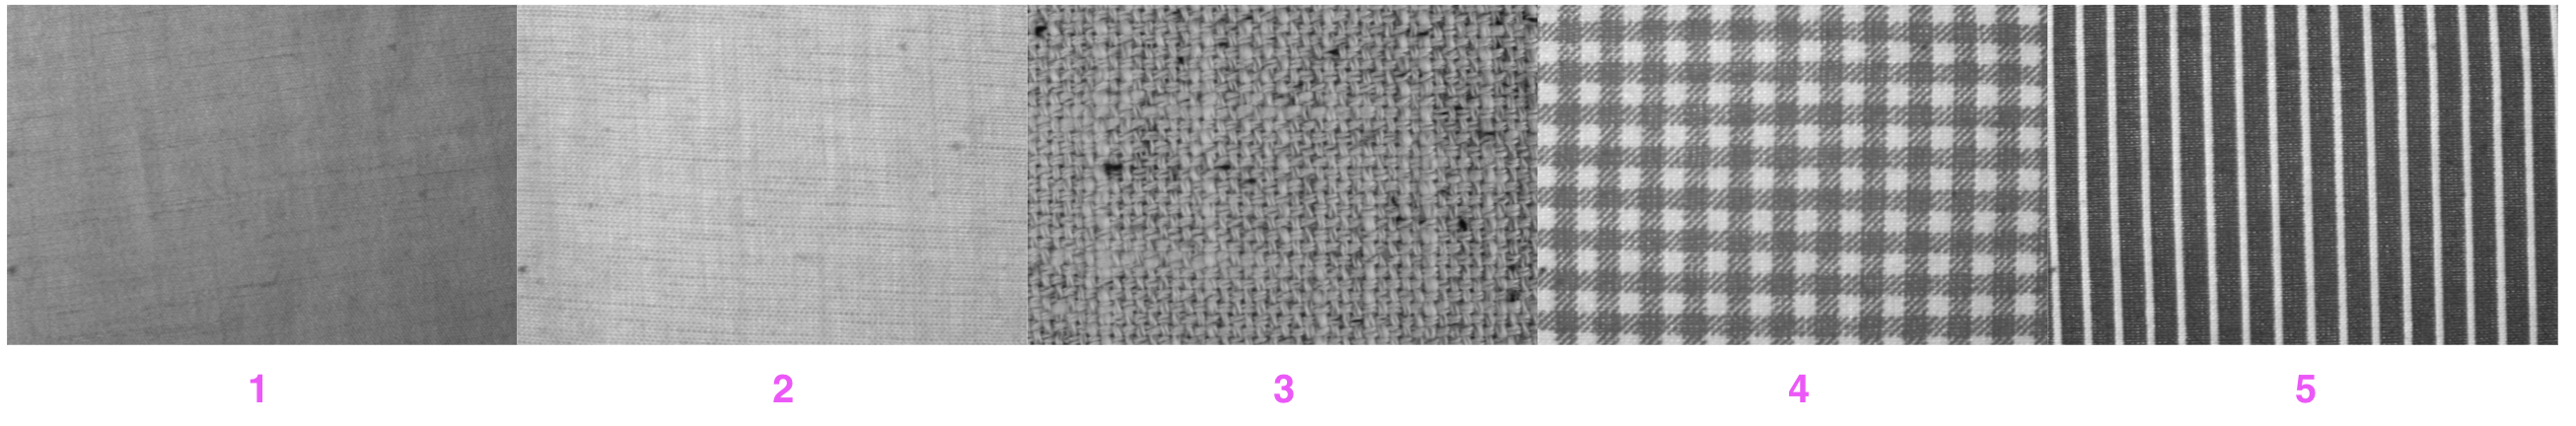

In [ ]:
c1r1 = ((tags['c'] == "c1") & (tags['r'] == "r1"))
tags.loc[c1r1, 'tipus'] = "Primer teixit"

In [ ]:
tags.head()

,Unnamed: 0,c,r,e,name,path,text,tipus
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Pequeño defecto de hilo en la mitad inferior d...,NaN
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Gran defecto de hilo en la imagen.,NaN
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Gran defecto de hilo en la imagen.,NaN
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Pequeño defecto de hilo en la mitad superior d...,NaN
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Gran defecto de hilo en la imagen.,NaN


In [ ]:
 tags.query(f'c == "c1" and r == "r1"').head()
 

,Unnamed: 0,c,r,e,name,path,text,tipus
2408,2408,c1,r1,e3,c1r1e3n9,badata/cd1/data/c1/r1/images/e3/c1r1e3n9.tif,Defecto de hilo en el centro de la imagen.,Primer teixit
2409,2409,c1,r1,e3,c1r1e3n7,badata/cd1/data/c1/r1/images/e3/c1r1e3n7.tif,Defecto de hilo en el borde derecho de la imagen.,Primer teixit
2410,2410,c1,r1,e3,c1r1e3n40,badata/cd1/data/c1/r1/images/e3/c1r1e3n40.tif,Gran defecto de hilo en el centro de la imagen.,Primer teixit
2411,2411,c1,r1,e3,c1r1e3n6,badata/cd1/data/c1/r1/images/e3/c1r1e3n6.tif,Fallo de hilo en la esquina inferior derecha d...,Primer teixit
2412,2412,c1,r1,e3,c1r1e3n1,badata/cd1/data/c1/r1/images/e3/c1r1e3n1.tif,Defecto de hilo en la parte superior de la ima...,Primer teixit


In [ ]:
c1 = ((tags['c'] == "c1"))
tags.loc[c1, 'tipus'] = "Primer teixit"

In [ ]:
c2r2 = ((tags['c'] == "c2") & (tags['r'] == "r2"))
tags.loc[c2r2, 'tipus'] = "Segon teixit"

c2r3 = ((tags['c'] == "c2") & (tags['r'] == "r3"))
tags.loc[c2r3, 'tipus'] = "Tercer teixit"

In [ ]:
c3r1 = ((tags['c'] == "c3") & (tags['r'] == "r1"))
tags.loc[c3r1, 'tipus'] = "Quart teixit"

c3r3 = ((tags['c'] == "c3") & (tags['r'] == "r3"))
tags.loc[c3r3, 'tipus'] = "Cinqué teixit"

In [ ]:
c4 = ((tags['c'] == "c4") )
tags.loc[c4, 'tipus'] = "Estampado"

In [ ]:
tags.head()

,Unnamed: 0,c,r,e,name,path,text,tipus
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Pequeño defecto de hilo en la mitad inferior d...,Quart teixit
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Gran defecto de hilo en la imagen.,Quart teixit
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Gran defecto de hilo en la imagen.,Quart teixit
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Pequeño defecto de hilo en la mitad superior d...,Quart teixit
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Gran defecto de hilo en la imagen.,Quart teixit


In [ ]:
tags.columns

Index(['Unnamed: 0', 'c', 'r', 'e', 'name', 'path', 'text', 'tipus'], dtype='object')

In [ ]:
classificacio = tags.drop(["Unnamed: 0", "text"], axis=1)

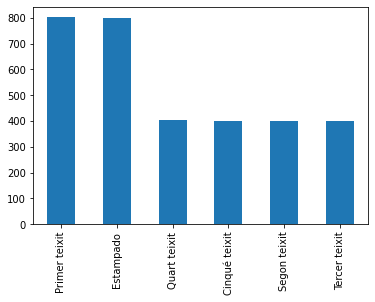

In [ ]:
classificacio.tipus.value_counts().plot(kind="bar")

In [ ]:
classificacio.head()

,c,r,e,name,path,tipus
0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Quart teixit
1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Quart teixit
2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Quart teixit
3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Quart teixit
4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Quart teixit


In [ ]:
classificacio.to_csv("gdrive/MyDrive/HackEPS2022/groc.csv")

# Gràfiques adicionals

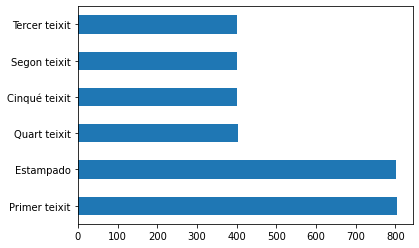

In [ ]:
classificacio["tipus"].value_counts().plot(kind = 'barh')